In [1]:
import sys
import numpy as np
import pandas
import matplotlib.pyplot as plt
import ternary
import json

sys.path.append("..")
from ternary_calculate import TernaryCalculate as tc
from antisolvent_calculate import AntisolventCalculate as ac

In [2]:
mpl_style_path = "/Users/parkhyuntae/Library/CloudStorage/GoogleDrive-prohyuntae@gmail.com/My Drive/projects/mpl_styles"
plt.style.use(mpl_style_path + "/timesnewromanstyle.mplstyle")

In [3]:
# Solute properties
ibuprofen = {
    "temp_melt": 347.6,
    "enth_fus": 27940,
    "file": "../cosmo_file/UD1264.cosmo",
    "name": "IBUPROFEN",
}

In [4]:
# Load solvent data
with open("./data/solvent_properties.json", "r") as solvent_json:
    solvent_data = json.load(solvent_json)

# Load antisolvent data
with open("./data/antisolvent_properties.json", "r") as antisolv_json:
    antisolv_data = json.load(antisolv_json)

<span style="font-size:15pt; color:orange">
    Note(Nov20): Should divide below cell into two </br>
    1. Generating data part
    2. Plotting part
</span>

System: IBUPROFEN-ETHANOL-ETHYLENE_GLYCOL
Initializing system...


FileNotFoundError: [Errno 2] No such file or directory: './cosmo_file/UD10.cosmo'

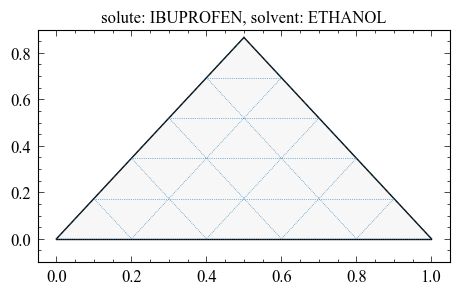

In [5]:
system = tc()
system.add_solute(**ibuprofen)
# Test with 1st element of solvent, ethanol
system.add_solvent(**solvent_data[0])
# Plot on ternary diagram
fig1, tax = ternary.figure(scale=1.0)
tax.boundary()
tax.gridlines(multiple=0.2)
tax.set_title(f"solute: {system.mole_name[0]}, solvent: {system.mole_name[1]}")
for antisolvent in antisolv_data:
    system.add_antisolvent(**antisolvent)
    calculator = ac(system, trace=False)
    tax.plot(calculator.ternary_data, linewidth=2.0, label=f"{system.mole_name[2]}")
    result = calculator.get_data(
        export="csv",
        file_name=f"./data2/{system.mole_name[0]}_{system.mole_name[1]}_{system.mole_name[2]}",
    )
    system.clear_antisolvent()
tax.legend(loc="upper right")